In [1]:
import aocd
from aocd.models import Puzzle
day = 15
year = 2021
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [381]:
import numpy as np
from collections import deque
import heapq
import bisect
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(100,
 ['1762397661132951281872118191829951912248172478339632549455181981251788927258534119468168714528621114',
  '8319319112748383315492426133271137584941117782129986515332716159745294224193293175158161499293222148',
  '8266728412139799931643116912557929947663988821211944399124893291926199243572783776173611922147331181',
  '9768991115438161618229664911612111659721489122113919117417168282889149141331521139589972137335416965',
  '3171539222181482245864217884221793163933341199835974591512912153611719383822886874252812189119211692',
  '9813861882122513794416142966122147931711931986114712961595314549632318377591159215157316813144934355',
  '7249291646824518193378853916825167931368827832213362177131511326161252924118148113122117239516894281',
  '7619265123128119111958978123298112151893112118796447627993349181166826971622479558261738365928333993',
  '2172119611123667198988912581135762996771929293568381611622194474422232946596921716259957372123899698',
  '4352214875122283151191299159125268139

In [3]:
test_data = """1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581""".splitlines()

In [519]:
def parse(data):
    dimy = len(data)
    dimx = len(data[0])
    f = np.zeros((dimx, dimy))
    for y in range(dimy):
        for x in range(dimx):
            f[x, y] = data[y][x]
    return f

def neighbors(pos, maxx, maxy):
    x, y = pos
    if x > 0:
        yield (x-1, y)
    if x < maxx-1:
        yield (x+1, y)
    if y > 0:
        yield (x, y-1)
    if y < maxy-1:
        yield (x, y+1)

def dijkstra(field):
    shape = field.shape 
    visited = set([])
    queued = set()
#     visited = np.zeros(shape, dtype=np.bool)

    distance = np.ones(shape, dtype=np.int32) * (2 << 30)
#     nodes = []
#     heapq.heappush(nodes, (0, (0, 0)))
    nodes = deque([(0, (0, 0))])
    distance[0, 0] = 0
    final = (shape[0]-1, shape[1]-1)
    while len(nodes):
        dist, nxt = nodes.popleft()
#         dist, nxt = heapq.heappop(nodes)
        if nxt in visited:
            continue
        visited.add(nxt)
        if nxt == final:
            return dist #, nodes, visited
        
        for nbr in neighbors(nxt, shape[0], shape[1]):
            if nbr in visited:
                continue
            if (dist+field[nbr]) < distance[nbr]:
                distance[nbr] = dist+field[nbr]
#             if visited[nbr] == False:

#                 i = 0
#                 try:
#                     while distance[nbr] > nodes[i][0]:
#                         i += 1                
#                 except IndexError:
#                     pass
                i = bisect.bisect_left(nodes, (distance[nbr], nbr))
                nodes.insert(i, (distance[nbr], nbr))
#             heapq.heappush(nodes, (distance[x, y], nbr))
    return distance


def heuristic(x, y, final, chunk=50):
    res = 0
    dx = (final[0] - x)  * 1
    dy = (final[1] - y)  * 1
    return dx + dy
    for d in (dx, dy):
        while d > chunk:
            res += d
            d -= chunk
        res += d
    return res

def astar(field):
    shape = field.shape 
    visited = np.zeros(shape, dtype=np.bool)
#     nodes = deque([(0, 0, (0, 0))])
    nodes = list([(0, 0, (0, 0))])

#     heapq.heappush(nodes, (0, 0, (0, 0)))
    final = (shape[0]-1, shape[1]-1)
    mn = 0
    steps = 0
    while len(nodes):
        mn = max(mn, len(nodes))
        steps += 1 
#         estimate, dist, nxt = nodes.popleft()
        estimate, dist, nxt = nodes.pop(0)
        if visited[nxt] == True:
            continue
        visited[nxt] = True
        if nxt == final:
            return dist, steps, mn, nodes, visited
        for nbr in neighbors(nxt, shape[0], shape[1]):
            x, y = nbr
            if visited[nbr] == False:
                distance = dist + field[x, y]
                estimate = distance + heuristic(x, y, final)

                i = 0
                try:
                    while estimate > nodes[i][0]:
                        i += 1                
                except IndexError:
                    pass
#                 heapq.heappush(nodes, (estimate, distance, nbr))
#                 i = bisect.bisect_left(nodes, (estimate, distance, nbr))
                if distance<2856:
                    nodes.insert(i, (estimate, distance, nbr))

    return None


def multiply(field, n):
    dx, dy = field.shape
    new_field = np.zeros((dx*n, dy*n), dtype=np.int8)
    for i in range(n):
        for j in range(n):
            new_field[i*dx:(i+1)*dx, j*dy:(j+1)*dy] = field + i + j
    new_field = ((new_field - 1) % 9) + 1
    return new_field
            
    
def minimum(field):
    dx, dy = field.shape
    mins = np.zeros(field.shape)
    for x in range(dx):
        for y in range(dy):
            if x==0 and y==0:
                continue
            mins[x, y] = min(mins[x-1, y] if x>0 else 2<<31, mins[x, y-1] if y>0 else 2<<31) + field[x, y]
    return mins

In [432]:
field = parse(data)
# field = multiply(field, 5)
field.shape

(100, 100)

In [440]:
%%time
_ = astar(field)

CPU times: user 3.09 s, sys: 3.96 ms, total: 3.09 s
Wall time: 3.09 s


In [467]:
%%time
dist, steps, mn, nodeds, visited = astar(field)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2.38 ms


In [524]:
%%time
field = parse(data)
# field = multiply(field, 5)
# field.shape
dist = dijkstra(field)


CPU times: user 230 ms, sys: 5 µs, total: 230 ms
Wall time: 230 ms


In [525]:
dist

472

In [102]:
puzzle.answer_a = int(dist)

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


In [133]:
# Part B

In [526]:
%%time
field = parse(data)
field = multiply(field, 5)
# field.shape
dist = dijkstra(field)

CPU times: user 2.6 s, sys: 16.1 ms, total: 2.62 s
Wall time: 2.62 s


In [527]:
dist

2851

In [515]:
puzzle.answer_b = int(dist)

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 15! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [357]:
%%time
field = parse(test_data)
field = multiply(field, 5)
dist, steps, mn, nodes = astar(field)

CPU times: user 812 ms, sys: 3.76 ms, total: 815 ms
Wall time: 813 ms


In [529]:
%%time
field = parse(data)
field = multiply(field, 5)
dist, distance = dijkstra(field)

CPU times: user 2.27 s, sys: 8 ms, total: 2.28 s
Wall time: 2.28 s


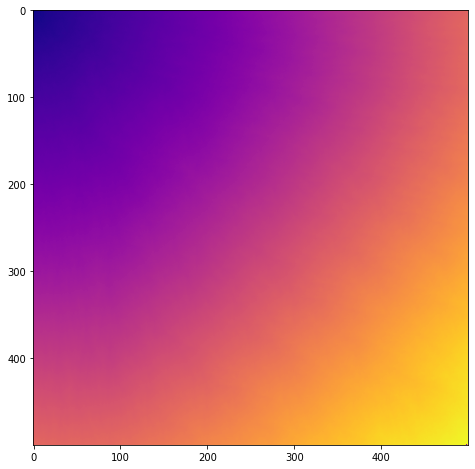

In [536]:
distance[distance == 2147483648]=0
plt.imshow(distance, cmap='plasma')

In [555]:
%%time
board = []
for l in open("./data/input_15").read().splitlines():
    board.append([int(l[x]) for x in range(len(l))])
distance = [[0] * 500 for _t in range(500)]
queue = [[(0, 0)]] + [[] for _t in range(10000)]
v = 0
while distance[499][499] == 0:
    for (y, x) in queue[v]:
        if v > distance[y][x]:
            continue
        for (dx, dy) in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            if y+dy >= 0 and y+dy < 500 and x+dx >= 0 and x+dx < 500:
                dt = ((board[(y+dy) % 100][(x+dx) % 100] +
                      (y+dy)//100 + (x+dx)//100 - 1) % 9)+1
                if distance[y+dy][x+dx] == 0:
                    distance[y+dy][x+dx] = v + dt
                    queue[v+dt].append((y+dy, x+dx))
    v += 1
print(distance[499][499])

2851
CPU times: user 2.13 s, sys: 3.95 ms, total: 2.14 s
Wall time: 2.13 s


In [549]:
goal = (499, 499)
steps = search(field, goal)
len(steps)

Visited 999 nodes


1995

In [551]:
print(sum(field[row][col] for (row, col) in path(goal, steps)) - field[0][0])

5054
